In [492]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
MarRef = pd.read_csv('../MarRef_DBs/MarRef_v5.txt', sep='\t', index_col=44)
mmetsp_taxonomy = pd.read_csv('/vortexfs1/omics/alexander/data/mmetsp/taxonomy_v2.txt', sep='\t',
                              encoding = "ISO-8859-1", index_col='Source_ID')

MarRef['taxon_lineage_ids'] = MarRef['taxon_lineage_ids'].loc[SYNTH.index].str.replace('│','|')

In [4]:
def MMETSP_groupby(df, level='Division', normalized=True):
    division_MMETSP = df.merge(mmetsp_taxonomy[level], left_index=True, right_index=True).groupby(level).sum()
    total_per_group = mmetsp_taxonomy.groupby(level)['Notes'].count()
    if normalized:
        division_MMETSP = division_MMETSP.T/total_per_group
        division_MMETSP = division_MMETSP.T
    return(division_MMETSP, total_per_group)
def create_cluster_bar(grouped_MMETSP, total_per_group, size=[12,12],
                       cutoff=False, c=5, genome=False, dropzero=False):
    grouped_MMETSP=grouped_MMETSP.dropna()
    if cutoff: 
        ii=total_per_group>c
        grouped_MMETSP= grouped_MMETSP.loc[ii]
        total_per_group=total_per_group[ii]
    if dropzero:
        ss= grouped_MMETSP[grouped_MMETSP.sum(axis=1)>0].index
        print(ss)
        grouped_MMETSP = grouped_MMETSP.loc[ss]
        total_per_group=total_per_group[ss]
    cluster = sns.clustermap(grouped_MMETSP, cmap='binary', yticklabels=1)
    cluster.fig.set_size_inches(size)
    
    # make some space to the right in the figure
    cluster.gs.update(right=0.95)
    # divide existing axes
    divider = make_axes_locatable(cluster.ax_heatmap)
    divider2 = make_axes_locatable(cluster.ax_col_dendrogram)
    # create new axes for bar plot 
    ax = divider.append_axes("right", size="20%", pad=1.7)
    # create empty space of same size as bar plot axes (don't use this space)
    nax = divider2.new_horizontal(size="20%", pad=1.7)
    target = [t.get_text() for t in np.array(cluster.ax_heatmap.get_yticklabels())]
    ind= np.array([list(grouped_MMETSP.index.values).index(t) for t in target])
    # plot bar plot in ax
    ax.barh(np.arange(len(target)), total_per_group.values[ind], color='k')
    ax.set_yticklabels([])
    ax.set_ylim(-0.5,len(grouped_MMETSP.index)-.5)
    ax.invert_yaxis()
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('top')
    if genome:
        ax.set_xlabel('Total Genomes')
    else:
        ax.set_xlabel('Total Transcriptomes')
    ax.xaxis.set_label_position('top') 
    cluster.cax.set_position([0.1, .8, .02, 0.2])
    cluster.cax.set_ylabel('Proportion Gene present')

    plt.show()
    return(cluster)

def bact_groupby(df, level='phylum', normalized=True):
    division_bact = df.merge(MarRef[level], left_index=True, right_index=True).groupby(level).sum()
    total_per_group = MarRef.groupby(level)['alt_elev'].count()
    if normalized:
        division_bact = division_bact.T/total_per_group
        division_bact = division_bact.T
    return(division_bact, total_per_group)

In [5]:
bact_synth = pd.read_csv('../predict_synthesis/predicted-bacterial-osmolyte-synthesis.tsv', sep ='\t', header=[0, 1], index_col=0)

In [6]:
SYNTH = bact_synth.xs('SYNTHESIS', level=1, drop_level=False, axis=1)
BD = bact_synth.xs('BREAKDOWN', level=1, drop_level=False, axis=1)
SYNTH.columns = SYNTH.columns.droplevel(1)
BD.columns = BD.columns.droplevel(1)


In [7]:
summedbact = pd.DataFrame(SYNTH.sum()/len(SYNTH))
bd = pd.DataFrame(BD.sum()/len(BD))
summedbact=summedbact.merge(bd, left_index=True, right_index=True)
summedbact.columns=['SYNTHESIS', 'BREAKDOWN']
summedbact.sort_values('SYNTHESIS', ascending=False)

,SYNTHESIS,BREAKDOWN
Glutamine,1.000000,0.998885
Glutamate,0.998885,1.000000
Glycerol,0.484950,0.770346
Proline,0.445931,1.000000
Sorbitol,0.437012,0.371237
Glycine betaine,0.352285,0.004459
Sucrose,0.351171,0.633222
Mannitol,0.247492,0.326644
Trehalose,0.212932,0.313266
Ectoine,0.143813,0.152731


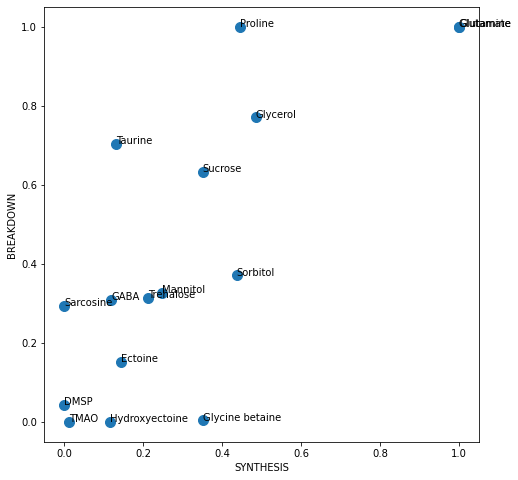

In [617]:
fig, ax = plt.subplots(1)
fig.set_size_inches(8,8)
ax.set_aspect('equal')
summedbact.plot(kind='scatter', x='SYNTHESIS', y='BREAKDOWN', ax = ax, s=100)
for i in summedbact.index:
    ax.text(summedbact.loc[i,'SYNTHESIS'], summedbact.loc[i,'BREAKDOWN'], i)

<AxesSubplot:xlabel='SYNTHESIS', ylabel='BREAKDOWN'>

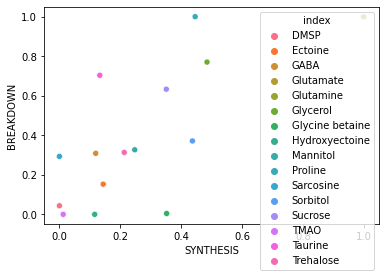

In [628]:
summedbact.reset_index()

,index,SYNTHESIS,BREAKDOWN
0,DMSP,0.000000,0.043478
1,Ectoine,0.143813,0.152731
2,GABA,0.119287,0.308807
3,Glutamate,0.998885,1.000000
4,Glutamine,1.000000,0.998885
5,Glycerol,0.484950,0.770346
6,Glycine betaine,0.352285,0.004459
7,Hydroxyectoine,0.115942,0.000000
8,Mannitol,0.247492,0.326644
9,Proline,0.445931,1.000000


In [11]:
euk_synth = pd.read_csv('../predict_synthesis/predicted-mmetsp-osmolyte-synthesis.tsv', sep ='\t', header=[0, 1], index_col=0)
euk_synth.index = euk_synth.index.str.strip('_clean')
ESYNTH = euk_synth.xs('SYNTHESIS', level=1, drop_level=False, axis=1)
EBD = euk_synth.xs('BREAKDOWN', level=1, drop_level=False, axis=1)
ESYNTH.columns = ESYNTH.columns.droplevel(1)
EBD.columns = EBD.columns.droplevel(1)

Esummed = pd.DataFrame(ESYNTH.sum()/len(ESYNTH))
Ebd = pd.DataFrame(EBD.sum()/len(EBD))
Esummed=Esummed.merge(Ebd, left_index=True, right_index=True)
Esummed.columns=['SYNTHESIS', 'BREAKDOWN']
Esummed.sort_values('SYNTHESIS', ascending=False)


,SYNTHESIS,BREAKDOWN
Glutamate,0.995399,0.995399
Glutamine,0.993865,0.993865
Glycerol,0.811350,0.858896
Sorbitol,0.765337,0.751534
Sucrose,0.753067,0.644172
Proline,0.535276,0.983129
Trehalose,0.246933,0.361963
Taurine,0.225460,0.475460
GABA,0.214724,0.286810
Mannitol,0.124233,0.056748


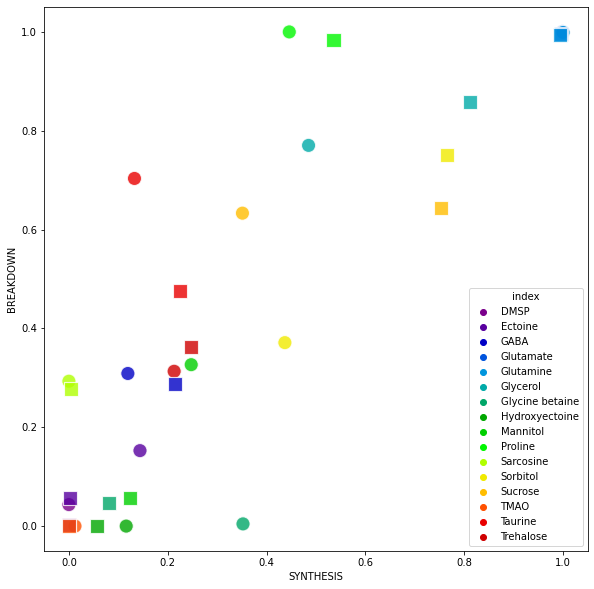

In [664]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
fig.set_size_inches(10,10)
cmap='nipy_spectral'
sns.scatterplot(data=summedbact.reset_index(), x='SYNTHESIS', y='BREAKDOWN',hue='index', 
                ax = ax, s=200,palette=cmap,alpha=0.8)
sns.scatterplot(data=Esummed.reset_index(), x='SYNTHESIS', y='BREAKDOWN',hue='index', ax = ax, 
                marker='s', s=200, legend=None, palette=cmap, alpha=0.8)

fig.savefig('figures/Comparison_synthesis.pdf')

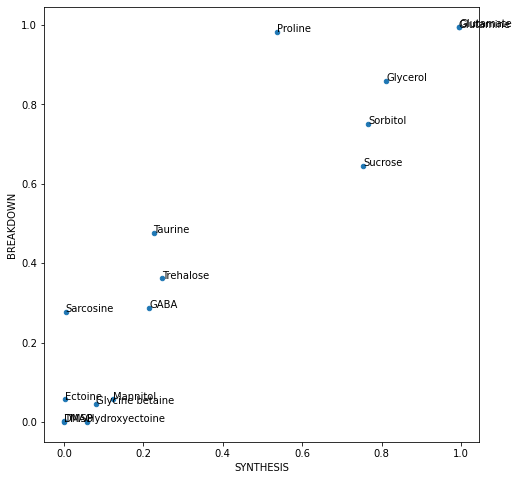

In [618]:
fig, ax = plt.subplots(1)
fig.set_size_inches(8,8)
ax.set_aspect('equal')
Esummed.plot(kind='scatter', x='SYNTHESIS', y='BREAKDOWN', ax = ax)
for i in Esummed.index:
    ax.text(Esummed.loc[i,'SYNTHESIS'], Esummed.loc[i,'BREAKDOWN'], i)

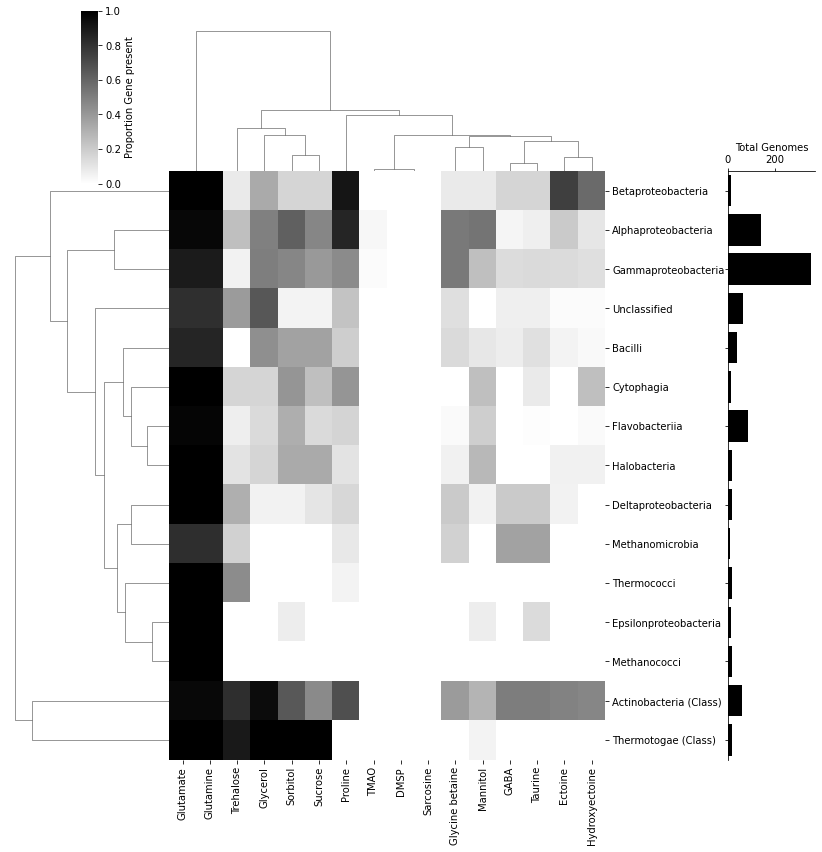

In [13]:
Sdivision_bact, Stotal_bac_group  = bact_groupby(SYNTH,  level='class', normalized=True)
create_cluster_bar(Sdivision_bact, Stotal_bac_group, genome=True, cutoff=True, c=10)

In [33]:
S

,DMSP,Ectoine,GABA,Glutamate,Glutamine,Glycerol,Glycine betaine,Hydroxyectoine,Mannitol,Proline,Sarcosine,Sorbitol,Sucrose,TMAO,Taurine,Trehalose
class,,,,,,,,,,,,,,,,
Actinobacteria,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000
Actinobacteria (Class),0.0,0.491803,0.508197,0.967213,0.967213,0.950820,0.393443,0.475410,0.295082,0.688525,0.0,0.655738,0.459016,0.000000,0.508197,0.819672
Alphaproteobacteria,0.0,0.209790,0.041958,0.972028,0.972028,0.496503,0.524476,0.097902,0.545455,0.853147,0.0,0.622378,0.475524,0.034965,0.062937,0.251748
Anaerolineae,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000
Aquificae,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Aquificae (Class),0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Archaeoglobi,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Bacillales (Class),0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
Bacilli,0.0,0.048780,0.073171,0.853659,0.853659,0.439024,0.146341,0.024390,0.097561,0.195122,0.0,0.365854,0.365854,0.000000,0.121951,0.000000


In [14]:
import ete3 

In [16]:
T = ete3.Tree('../GToBacterialTree2/GToBacterialTree2.tre')

In [17]:
T.get_farthest_leaf()

(Tree node 'GCF_000299395.1_Archaea_Thaumarchaeota_NA_Candidatus_Nitrosopumilus_sediminis_AR2' (-0x7ffffd555167125b),
 3.87465249)

In [18]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()


In [24]:
MarRef['NCBI_taxon_identifier']

assembly_accession_refseq
GCF_000221005.1     520461
GCF_000196255.1     298386
GCF_000195085.1    1002672
GCF_000024465.1     488538
GCF_000267545.1    1196835
                    ...   
GCF_003952245.1      75588
GCF_003970715.1      66425
GCF_004014715.1    1709477
GCF_004014695.1    1628392
GCF_004022545.1     170679
Name: NCBI_taxon_identifier, Length: 970, dtype: int64

In [44]:
MarRef.merge(SYNTH, left_index=True, right_index=True).groupby('phylum')[SYNTH.columns].mean()


,DMSP,Ectoine,GABA,Glutamate,Glutamine,Glycerol,Glycine betaine,Hydroxyectoine,Mannitol,Proline,Sarcosine,Sorbitol,Sucrose,TMAO,Taurine,Trehalose
phylum,,,,,,,,,,,,,,,,
Actinobacteria,0.0,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000
Actinobacteria (Phylum),0.0,0.491803,0.508197,1.000000,1.0,0.983607,0.409836,0.475410,0.311475,0.704918,0.0,0.672131,0.475410,0.000000,0.508197,0.852459
Aquificae,0.0,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Aquificae (Phylum),0.0,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Bacteroidetes,0.0,0.000000,0.008929,1.000000,1.0,0.241071,0.026786,0.044643,0.187500,0.178571,0.0,0.330357,0.178571,0.000000,0.026786,0.151786
Calditrichaeota,0.0,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
Chlorobi,0.0,0.000000,0.000000,1.000000,1.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.800000
Chloroflexi,0.0,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000
Crenarchaeota,0.0,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.375000



                                                 /-Deferribacteres, phylum
                                                |
                                                |--Fusobacteria, phylum
                                                |
                                                |-Thermotogae, phylum-Thermotogae, class
                                                |
                                                |--FCB group, clade
                                                |
                                                |--Proteobacteria, phylum
                                                |
                                                |--Terrabacteria group, clade
                                                |
                           /Bacteria, superkingdom-Synergistetes, phylum
                          |                     |
                          |                     |--Thermodesulfobacteria, phylum
                          |            

In [68]:
import dendropy

ModuleNotFoundError: No module named 'dendropy'

In [61]:
MarRef['taxon_lineage_ids'].str.split('|').str[2].unique()

array(['1224', '1783272', '28890', '200940', '200918', '200783',
       '1783270', '1783275', '200930', '1783257', '2323', '1783276',
       '508458', '32066', '203691', '188708', '1930617',
       '1783270│976│117743│200644│49546│1176327',
       '1224│28211│356│119043│444432', '1224│28211│204457│335929│1041',
       '1224│28211│204457│41297│1434046',
       '1224│1236│135622│267888│53246│227',
       '1783270│68336│976│117743│200644│49546', nan,
       '1224│28211│356│45401│46913'], dtype=object)

In [62]:
[int(i) for i in ['1224', '1783272', '28890', '200940', '200918', '200783',
       '1783270', '1783275', '200930', '1783257', '2323', '1783276',
       '508458', '32066', '203691', '188708', '1930617',]]

[1224,
 1783272,
 28890,
 200940,
 200918,
 200783,
 1783270,
 1783275,
 200930,
 1783257,
 2323,
 1783276,
 508458,
 32066,
 203691,
 188708,
 1930617]

In [78]:
df = pd.DataFrame()
for i in tree.get_leaf_names():
    for j in tree.get_leaf_names():
        if i == j :
            pass
        else:
            d = tree.get_distance(i,j)
            df.loc[i,j]=d

In [79]:
df

,32066,188708,1783270,1224,1783272,508458,200940,203691,200783,1783257,2323,1930617,1783275,1783276,28890,200930
200930,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,NaN
32066,NaN,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2.0
188708,3.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,3.0
1783270,2.0,3.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2.0
1224,2.0,3.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2.0
1783272,2.0,3.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2.0
508458,2.0,3.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2.0
200940,2.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2.0
203691,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2.0
200783,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,4.0,4.0,4.0,2.0


In [361]:
test = MarRef['taxon_lineage_ids'].loc[SYNTH.index]
for i in test.index:
    if len(test[i]) <5: 
        print(i, test[i])

In [362]:
test = pd.DataFrame(test)
test[['t0', 't1', 't2','t3']] = test['taxon_lineage_ids'].str.split('|').str[:4].to_list()
gp = test.groupby(['t0', 't1', 't2']).count()
to_group = gp[gp<10].dropna().reset_index()['t2']


In [364]:
targets = ['1224', '1783270','1783272']
gp = test.groupby(['t0', 't1', 't2', 't3']).count().reset_index()
gp[gp['t2'].isin(targets)]

,t0,t1,t2,t3,taxon_lineage_ids
0,131567,2,1224,1236,317
1,131567,2,1224,1553900,2
2,131567,2,1224,28211,138
3,131567,2,1224,28216,12
4,131567,2,1224,580370,2
5,131567,2,1224,68525,34
8,131567,2,1783270,68336,113
9,131567,2,1783270,976,1
10,131567,2,1783272,1117,32
11,131567,2,1783272,1239,49


In [543]:
BD_MERGE = BD.merge(MarRef[['kingdom','phylum','class']], left_index=True, right_index=True)

SYNTH_MERGE = SYNTH.merge(MarRef[['kingdom','phylum','class']], left_index=True, right_index=True)

def make_plotting_groups(test2):
    
    short = ['Aquificae', 'Aquificae (Phylum)', 'Calditrichaeota', 'Chlorobi',
       'Chloroflexi', 'Deferribacteres (Phylum)', 'Deinococcus-Thermus',
       'Fusobacteria', 'Oligoflexia', 'Planctomycetes', 'Spirochaetes',
       'Synergistetes', 'Tenericutes', 'Thermodesulfobacteria (Phylum)',
       'Unclassified', 'Verrucomicrobia', 'Zetaproteobacteria']
    for i in test2.index:
        if test2.loc[i,'phylum'] =='Proteobacteria':
            test2.loc[i, 'plot_grouping'] = test2.loc[i, 'class']
        elif test2.loc[i,'phylum'] == 'Actinobacteria (Phylum)':
            test2.loc[i, 'plot_grouping'] = 'Actinobacteria'
        elif test2.loc[i,'kingdom'] == 'Archaea':
            test2.loc[i, 'plot_grouping'] = 'Archaea'
        elif test2.loc[i, 'phylum'] in short:
            test2.loc[i, 'plot_grouping'] = 'Other'
        else:
            test2.loc[i, 'plot_grouping'] = test2.loc[i, 'phylum']
    return(test2)
BD_MERGE = make_plotting_groups(BD_MERGE)
SYNTH_MERGE = make_plotting_groups(SYNTH_MERGE)

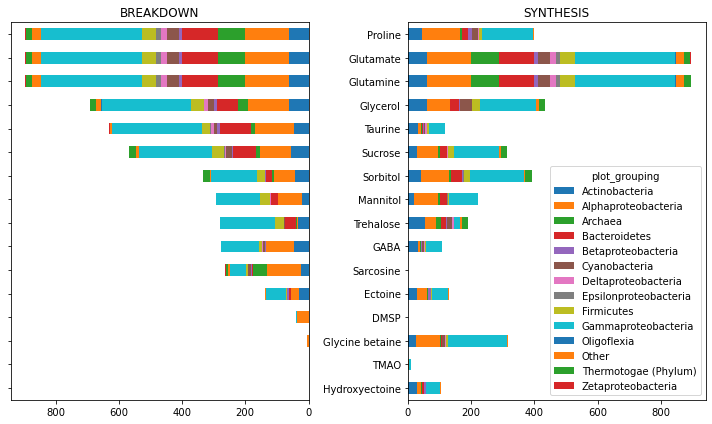

In [614]:

bg = BD_MERGE.groupby('plot_grouping').sum()
sg = SYNTH_MERGE.groupby('plot_grouping').sum()
order = bg.sum().sort_values(ascending=True).index
sg=sg[order]
bg = bg[order]
fig, ax = plt.subplots(1,2, figsize=[10,6])
sg.T.plot(kind='barh', stacked=True, ax=ax[1])
bg.T.plot(kind='barh', stacked=True, ax=ax[0], legend=None, )
ax[0].set_title('BREAKDOWN')
ax[0].invert_xaxis()
ax[1].set_title('SYNTHESIS')
ax[0].set_yticklabels([]);
# ax[1].legend(loc=[1,0], )
fig.tight_layout()
fig.savefig('figures/Synthesis-Breakdown.pdf')

In [613]:
bg

,Hydroxyectoine,TMAO,Glycine betaine,DMSP,Ectoine,Sarcosine,GABA,Trehalose,Mannitol,Sorbitol,Sucrose,Taurine,Glycerol,Glutamine,Glutamate,Proline
plot_grouping,,,,,,,,,,,,,,,,
Actinobacteria,0,0,0,0,29,24,45,34,20,42,55,45,62,62,62,62
Alphaproteobacteria,0,0,4,37,26,107,88,4,78,66,100,124,129,139,139,139
Archaea,0,0,0,0,2,44,1,1,0,6,11,12,32,86,86,86
Bacteroidetes,0,0,0,0,5,4,0,34,21,21,72,99,68,112,112,112
Betaproteobacteria,0,0,0,0,7,2,5,1,1,2,5,9,9,12,12,12
Cyanobacteria,0,0,0,0,0,9,6,2,0,0,17,11,19,38,38,38
Deltaproteobacteria,0,0,0,0,0,3,1,0,1,1,5,9,10,19,19,19
Epsilonproteobacteria,0,0,0,0,0,0,0,0,1,0,1,3,1,14,14,14
Firmicutes,0,0,0,0,1,5,10,29,30,25,38,25,42,46,46,46


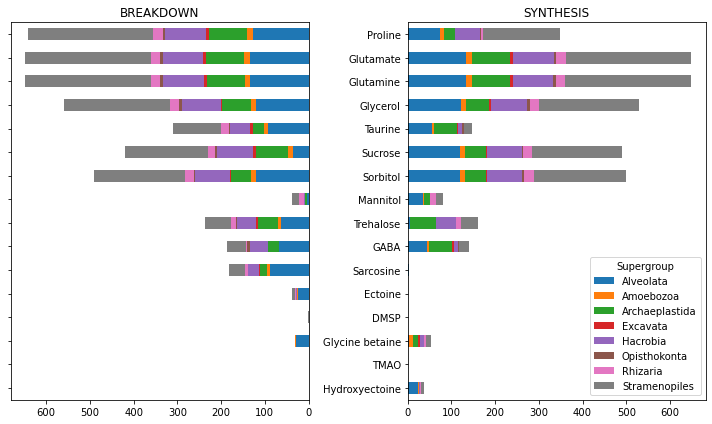

In [615]:
ESYNTH_MERGE = ESYNTH.merge(mmetsp_taxonomy, left_index=True, right_index=True).groupby('Supergroup').sum()[SYNTH.columns]
EBD_MERGE = EBD.merge(mmetsp_taxonomy, left_index=True, right_index=True).groupby('Supergroup').sum()[SYNTH.columns]

fig, ax = plt.subplots(1,2, figsize=[10,6])
ESYNTH_MERGE[order].T.plot(kind='barh', stacked=True, ax=ax[1])
EBD_MERGE[order].T.plot(kind='barh', stacked=True, ax=ax[0], legend=None, )
ax[0].set_title('BREAKDOWN')
ax[0].invert_xaxis()
ax[1].set_title('SYNTHESIS')
ax[0].set_yticklabels([]);
# ax[1].legend(loc=[1,0], )
fig.tight_layout()
fig.savefig('figures/Synthesis-Breakdown-EUKS.pdf')

In [546]:
columns = ['genome_length','gc_content','genes']
SYNTH_MERGE2 = SYNTH_MERGE.merge(MarRef[columns], left_index=True, right_index=True)
SYNTH_MERGE2

,DMSP,Ectoine,GABA,Glutamate,Glutamine,Glycerol,Glycine betaine,Hydroxyectoine,Mannitol,Proline,...,TMAO,Taurine,Trehalose,kingdom,phylum,class,plot_grouping,genome_length,gc_content,genes
GCF_000006175.1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,Archaea,Euryarchaeota,Methanococci,Archaea,1936388,28.59,1741
GCF_000007225.1,0,0,0,1,1,0,0,0,0,0,...,0,0,1,Archaea,Crenarchaeota,Thermoprotei,Archaea,2222431,51.36,2545
GCF_000007305.1,0,0,0,1,1,0,0,0,0,0,...,0,0,1,Archaea,Euryarchaeota,Thermococci,Archaea,1908257,40.77,2121
GCF_000007925.1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,Bacteria,Cyanobacteria,Unclassified,Cyanobacteria,1751081,36.44,2464
GCF_000008465.1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,Gammaproteobacteria,2839319,47.04,2722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_900476435.1,0,0,0,1,1,0,0,0,0,1,...,0,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,Gammaproteobacteria,4353505,45.86,3958
GCF_900538275.1,0,0,0,1,1,1,0,0,0,0,...,0,0,1,Bacteria,Firmicutes,Clostridia,Firmicutes,3518882,37.27,3229
GCF_900574125.1,0,1,0,1,1,0,1,0,1,1,...,0,0,0,Bacteria,Proteobacteria,Alphaproteobacteria,Alphaproteobacteria,4712067,59.07,4498
GCF_900636325.1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,Bacteria,Firmicutes,Bacilli,Firmicutes,2798161,37.80,2633


In [589]:

meta_cols = ['DMSP', 'Ectoine', 'GABA', 'Glutamate', 'Glutamine', 'Glycerol',
       'Glycine betaine', 'Hydroxyectoine', 'Mannitol', 'Proline', 'Sarcosine',
       'Sorbitol', 'Sucrose', 'TMAO', 'Taurine', 'Trehalose','genome_length']

for n, g in SYNTH_MERGE2.groupby('plot_grouping'):
    print(n)
    print(g)
    if n=='Alphaproteobacteria':
        break

Actinobacteria
                 DMSP  Ectoine  GABA  Glutamate  Glutamine  Glycerol  \
GCF_000010105.1     0        1     1          1          1         1   
GCF_000016425.1     0        0     1          1          1         1   
GCF_000018265.1     0        0     1          1          1         1   
GCF_000018885.1     0        0     1          1          1         1   
GCF_000023925.1     0        1     0          1          1         0   
...               ...      ...   ...        ...        ...       ...   
GCF_900091425.1     0        0     0          1          1         1   
GCF_900099705.1     0        0     0          1          1         1   
GCF_900102005.1     0        0     0          1          1         1   
GCF_900105445.1     0        0     0          1          1         1   
GCF_900105865.1     0        0     0          1          1         1   

                 Glycine betaine  Hydroxyectoine  Mannitol  Proline  ...  \
GCF_000010105.1                0            

In [567]:
data = g[['Mannitol','genome_length']]

In [581]:
data.genome_length=data.genome_length.astype(float)

<AxesSubplot:xlabel='Mannitol', ylabel='genome_length'>

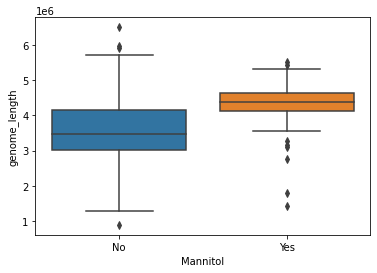

In [582]:
data = data.replace(0,'No')
data = data.replace(1,'Yes')
sns.boxplot(data = data, x='Mannitol', y='genome_length')

In [594]:
g = g.replace(0, 'No')
g = g.replace(1, 'Yes')
g = g[meta_cols]
g.genome_length=g.genome_length.astype(float)

In [612]:
sns.boxenplot()

,DMSP,Ectoine,GABA,Glutamate,Glutamine,Glycerol,Glycine betaine,Hydroxyectoine,Mannitol,Proline,Sarcosine,Sorbitol,Sucrose,TMAO,Taurine,Trehalose,genome_length
GCF_000011965.2,No,No,No,Yes,Yes,No,Yes,No,No,Yes,No,No,No,Yes,No,No,4601049.0
GCF_000012345.1,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,1308760.0
GCF_000013005.1,No,No,No,Yes,Yes,No,No,No,No,Yes,No,No,Yes,No,No,Yes,3052399.0
GCF_000013025.1,No,Yes,No,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No,No,Yes,3705022.0
GCF_000013565.1,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,No,4404050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_003970735.1,No,No,No,Yes,Yes,No,No,No,Yes,Yes,No,Yes,No,No,No,Yes,4351658.0
GCF_900095155.1,No,No,Yes,Yes,Yes,No,Yes,No,No,Yes,No,No,No,No,Yes,No,3442382.0
GCF_900105595.1,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,No,Yes,No,4626255.0
GCF_900215505.1,No,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,No,No,5110332.0


In [255]:
for i in set(levels[2]):
    print(i)
    print(ncbi.get_common_names(i))

1783257
{2: 'eubacteria'}
28890
{2: 'eubacteria'}
1783275
{2: 'eubacteria'}
200918
{2: 'eubacteria'}
508458
{}
200930
{2: 'eubacteria'}
32066
{2: 'eubacteria'}
1783270
{2: 'eubacteria'}
200783
{2: 'eubacteria'}
2323
{2: 'eubacteria'}
203691
{2: 'eubacteria'}
1783272
{2: 'eubacteria'}
1224
{2: 'eubacteria'}
200940
{2: 'eubacteria'}
1930617
{}
188708
{}


In [261]:
tree = ncbi.get_topology([int(i) for i in set(levels[2])])

print(tree.get_ascii(attributes=["sci_name", "rank"]))


                                                 /-Deferribacteres, phylum
                                                |
                                                |--Fusobacteria, phylum
                                                |
                                                |-Thermotogae, phylum-Thermotogae, class
                                                |
                                                |--FCB group, clade
                                                |
                                                |--Terrabacteria group, clade
                                                |
                                                |--Proteobacteria, phylum
                                                |
                           /Bacteria, superkingdom-Synergistetes, phylum
                          |                     |
                          |                     |--Spirochaetes, phylum
                          |                     

In [268]:
test

assembly_accession_refseq
GCF_000210915.2    131567|2|1224|68525|28221|213481|1652132|16521...
GCF_000590925.1    131567|2|1224|28211|204455|31989|159345|159346...
GCF_001044335.1            131567|2|1224|28216|206350|383630|1623448
GCF_000015645.1     131567|2|1783272|1117|1212|1217|1218|1219|146891
GCF_000485905.1      131567|2|1224|1236|135613|72276|1335745|1335757
                                         ...                        
GCF_000010405.1        131567|2|1224|1236|118884|32036|410330|412965
GCF_000178875.2     131567|2|1224|1236|135622|267890|22|62322|693973
GCF_002983865.1           131567|2|1224|28211|204455|31989|2433|2434
GCF_000439495.1    131567|2|1224|1236|135622|72275|226|314275|130...
GCF_000013045.1    131567|2|1783270|68336|976|1100069|563843|1469...
Name: taxon_lineage_ids, Length: 897, dtype: object